### Logistic Regression with Multiple Features

In this notebook I'll look at logistic regression for 2D continuous data. The data used comes from the iris dataset (The iris dataset is actually built into sklearn). This dataset includes sepal and petal measurements from three species of iris. The goal is to predict the specific species of iris from the features. I'll look at just the sepal length and width in centimeters and restrict to the Iris Virginica and Iris Versicolor species.

In [6]:
import numpy as np 
from scipy import stats
import statsmodels.api as sm 
import pandas as pd
import matplotlib.pylab as plt 
import pyarrow

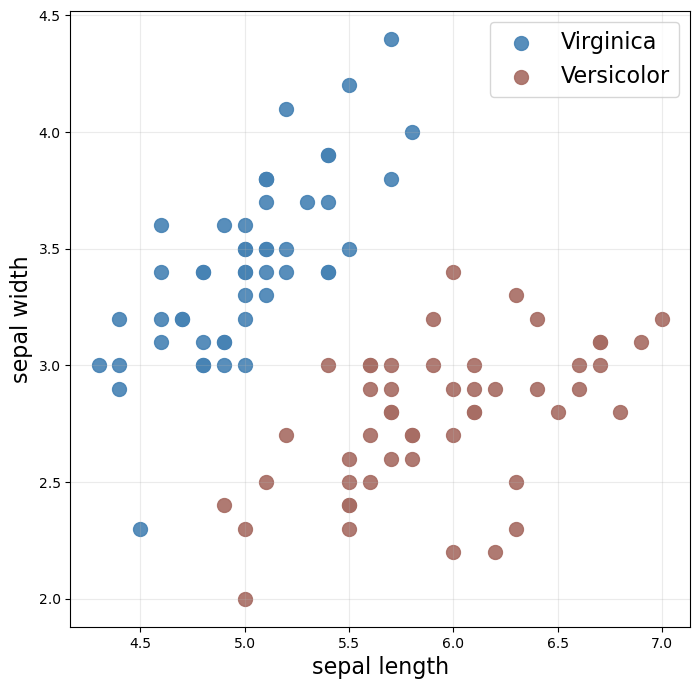

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[iris.target != 2, :2] # first two features and
y = iris.target[iris.target != 2]   # first two labels only 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.scatter(X[y==0, 0], X[y==0, 1], s=100, alpha=0.9, c="steelblue", label="Virginica")
ax.scatter(X[y==1, 0], X[y==1, 1], s=100, alpha=0.9, c="#a76c63", label="Versicolor")
ax.legend(loc="upper right", fontsize=16)
ax.set_xlabel('sepal length', fontsize=16)
ax.set_ylabel('sepal width', fontsize=16);
ax.grid(alpha=0.25)

plt.show()

I'll use sklearn to fit a Logistic Regression model to the data

In [10]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

b0 = logreg.intercept_[0]  # intercept (beta_0)
b1, b2 = logreg.coef_[0]   # coefficients (beta_1 and beta_2)

print("beta_0 = {:.5f}".format(b0))
print("beta_1 = {:.5f}".format(b1))
print("beta_2 = {:.5f}".format(b2))

beta_0 = -7.33819
beta_1 = 3.08267
beta_2 = -3.01868


&emsp; ***Prediction for labeling***


Recall that the decision rule for Logistic Regression is to predict $\hat{y}=1$ if 

$$
\textrm{sigm}(\hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2) \geq 0.5 
$$

The points where $\textrm{sigm}(z)$ is exactly equal to $0.5$ is called the decision boundary.  For Logistic Regression the decision boundary is a line in two-dimensional space such that everything on one side of the line is predicted to be from Class $0$ and everything on the other side of the line is predicted to be from Class $1$. I we think about $x_1$ as $x$ and $x_2$ as $y$ and know that the sigmoid function is equal to $0.5$ when it's argument is equal to $0$, then we have

$$
\hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 = 0 \quad \Rightarrow \quad x_2 = -\dfrac{\beta_0}{\beta_2}  -\dfrac{\beta_1}{\beta_2} x_1   
$$

This is the line of the form $y = mx + b$ with slope $m = - \beta_1 / \beta_2$ and intercept $b = -\beta_0 / \beta_2$. 

Plugging the computed values from the model into this formula we can plot the decision boundary. 

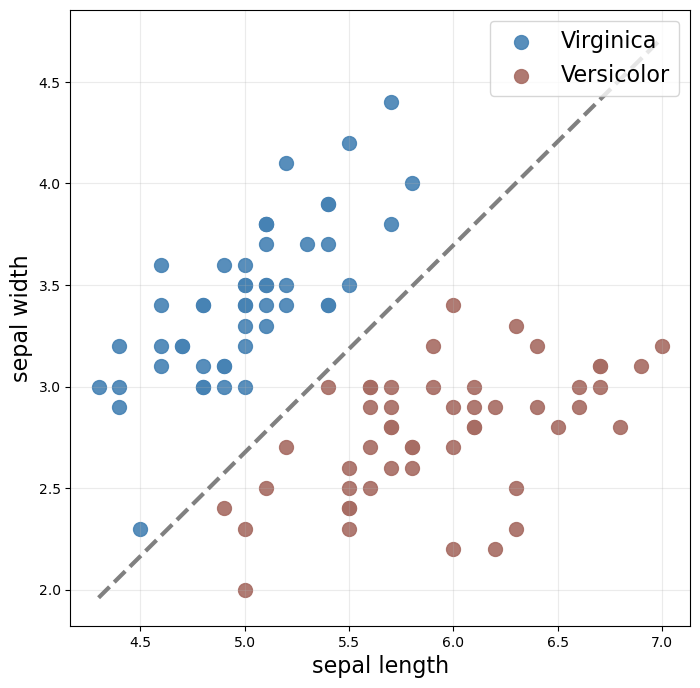

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.scatter(X[y==0, 0], X[y==0, 1], s=100, alpha=0.9, c="steelblue", label="Virginica")
ax.scatter(X[y==1, 0], X[y==1, 1], s=100, alpha=0.9, c="#a76c63", label="Versicolor")
ax.legend(loc="upper right", fontsize=16)
ax.set_xlabel('sepal length', fontsize=16)
ax.set_ylabel('sepal width', fontsize=16);
ax.grid(alpha=0.25)

xx = np.linspace(np.min(X[:,0]),np.max(X[:,0]))
ax.plot(xx, -b0/b2 - b1/b2 * xx, color="gray", lw=3, ls="--");

plt.show()